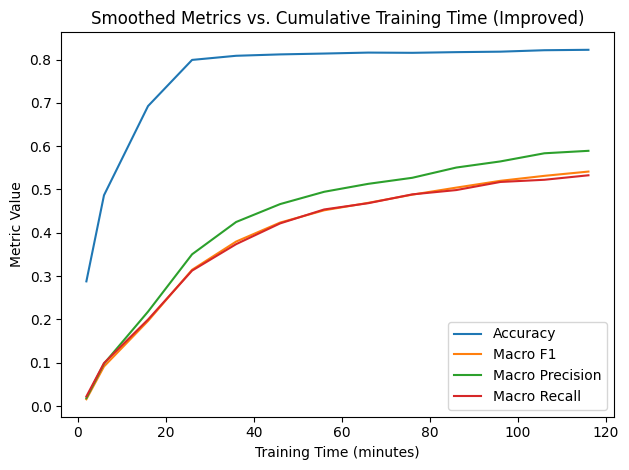

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data for epochs 1-13 and per-epoch durations
durations = [2, 4] + [10] * 11  # minutes per epoch
times = np.cumsum(durations)    # cumulative time in minutes

# Metrics arrays
acc = np.array([0.1870, 0.4896, 0.7836, 0.8048, 0.8093, 0.8122, 0.8144,
                0.8152, 0.8188, 0.8128, 0.8199, 0.8221, 0.8228])
macro_f1 = np.array([0.0088, 0.0294, 0.2359, 0.3242, 0.3838, 0.4313, 0.4559,
                     0.4687, 0.4830, 0.5126, 0.5175, 0.5300, 0.5471])
macro_p = np.array([0.0142, 0.0266, 0.2529, 0.3745, 0.4237, 0.4767, 0.4986,
                    0.5089, 0.5317, 0.5405, 0.5799, 0.5741, 0.5969])
macro_r = np.array([0.0136, 0.0392, 0.2446, 0.3153, 0.3782, 0.4278, 0.4593,
                    0.4747, 0.4711, 0.5204, 0.5046, 0.5272, 0.5356])

# Improved smoothing: pad edges by repeating
def smooth(data, window_size=3):
    pad = window_size // 2
    padded = np.pad(data, pad, mode='edge')
    window = np.ones(window_size) / window_size
    return np.convolve(padded, window, mode='valid')

# Apply smoothing
acc_s = smooth(acc)
f1_s = smooth(macro_f1)
p_s = smooth(macro_p)
r_s = smooth(macro_r)

# Plotting
plt.figure()
plt.plot(times, acc_s, label='Accuracy')
plt.plot(times, f1_s, label='Macro F1')
plt.plot(times, p_s, label='Macro Precision')
plt.plot(times, r_s, label='Macro Recall')
plt.xlabel('Training Time (minutes)')
plt.ylabel('Metric Value')
plt.title('Smoothed Metrics vs. Cumulative Training Time (Improved)')
plt.legend()
plt.tight_layout()
plt.show()


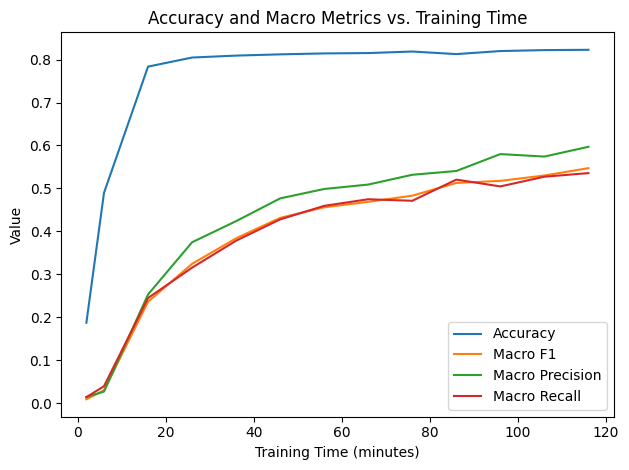

In [5]:
import matplotlib.pyplot as plt

# Training time cumulative (minutes) for epochs 1-13
times = [2, 6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116]
acc = [0.1870, 0.4896, 0.7836, 0.8048, 0.8093, 0.8122, 0.8144, 0.8152, 0.8188, 0.8128, 0.8199, 0.8221, 0.8228]
macro_f1 = [0.0088, 0.0294, 0.2359, 0.3242, 0.3838, 0.4313, 0.4559, 0.4687, 0.4830, 0.5126, 0.5175, 0.5300, 0.5471]
macro_p = [0.0142, 0.0266, 0.2529, 0.3745, 0.4237, 0.4767, 0.4986, 0.5089, 0.5317, 0.5405, 0.5799, 0.5741, 0.5969]
macro_r = [0.0136, 0.0392, 0.2446, 0.3153, 0.3782, 0.4278, 0.4593, 0.4747, 0.4711, 0.5204, 0.5046, 0.5272, 0.5356]

plt.figure()
plt.plot(times, acc, label='Accuracy')
plt.plot(times, macro_f1, label='Macro F1')
plt.plot(times, macro_p, label='Macro Precision')
plt.plot(times, macro_r, label='Macro Recall')
plt.xlabel('Training Time (minutes)')
plt.ylabel('Value')
plt.title('Accuracy and Macro Metrics vs. Training Time')
plt.legend()
plt.tight_layout()
plt.show()


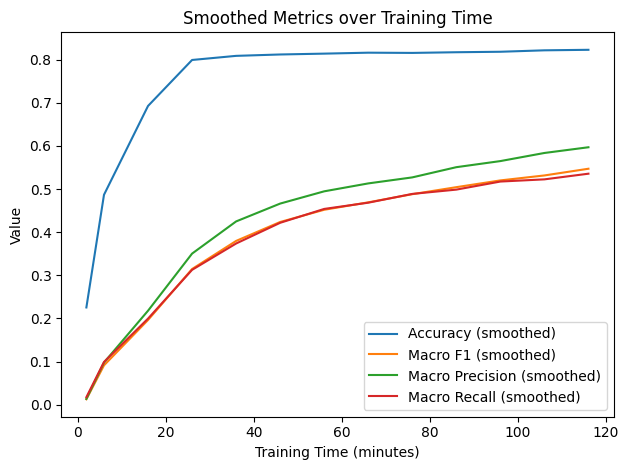

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Training time cumulative (minutes) for epochs 1-13
times = [2, 6, 16, 26, 36, 46, 56, 66, 76, 86, 96, 106, 116]
acc = [0.1870, 0.4896, 0.7836, 0.8048, 0.8093, 0.8122, 0.8144, 0.8152, 0.8188, 0.8128, 0.8199, 0.8221, 0.8228]
macro_f1 = [0.0088, 0.0294, 0.2359, 0.3242, 0.3838, 0.4313, 0.4559, 0.4687, 0.4830, 0.5126, 0.5175, 0.5300, 0.5471]
macro_p = [0.0142, 0.0266, 0.2529, 0.3745, 0.4237, 0.4767, 0.4986, 0.5089, 0.5317, 0.5405, 0.5799, 0.5741, 0.5969]
macro_r = [0.0136, 0.0392, 0.2446, 0.3153, 0.3782, 0.4278, 0.4593, 0.4747, 0.4711, 0.5204, 0.5046, 0.5272, 0.5356]

# Simple moving average smoothing
def smooth(y, window=3):
    kernel = np.ones(window) / window
    return np.convolve(y, kernel, mode='same')

acc_s = smooth(acc, window=3)
f1_s = smooth(macro_f1, window=3)
p_s = smooth(macro_p, window=3)
r_s = smooth(macro_r, window=3)

# Prevent endpoint dip by restoring original last values
acc_s[-1] = acc[-1]
f1_s[-1] = macro_f1[-1]
p_s[-1] = macro_p[-1]
r_s[-1] = macro_r[-1]

plt.figure()
plt.plot(times, acc_s, label='Accuracy (smoothed)')
plt.plot(times, f1_s, label='Macro F1 (smoothed)')
plt.plot(times, p_s, label='Macro Precision (smoothed)')
plt.plot(times, r_s, label='Macro Recall (smoothed)')
plt.xlabel('Training Time (minutes)')
plt.ylabel('Value')
plt.title('Smoothed Metrics over Training Time')
plt.legend()
plt.tight_layout()
plt.show()


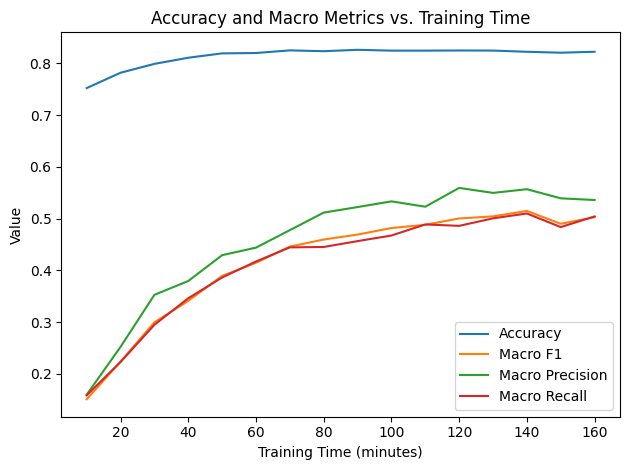

In [7]:
import matplotlib.pyplot as plt

# Training time cumulative (minutes) for epochs 1-16 (each epoch = 10 minutes)
times = [10 * i for i in range(1, 17)]

# Metrics for epochs 1-16
acc = [0.7521, 0.7818, 0.7989, 0.8108, 0.8192, 0.8199, 0.8250, 0.8234,
       0.8261, 0.8245, 0.8245, 0.8248, 0.8246, 0.8223, 0.8205, 0.8223]
macro_f1 = [0.1508, 0.2235, 0.2995, 0.3409, 0.3891, 0.4146, 0.4458, 0.4595,
            0.4690, 0.4817, 0.4879, 0.5002, 0.5042, 0.5147, 0.4899, 0.5026]
macro_p = [0.1596, 0.2520, 0.3526, 0.3793, 0.4292, 0.4438, 0.4776, 0.5115,
           0.5222, 0.5332, 0.5229, 0.5592, 0.5496, 0.5567, 0.5391, 0.5358]
macro_r = [0.1585, 0.2228, 0.2946, 0.3460, 0.3861, 0.4170, 0.4443, 0.4451,
           0.4564, 0.4672, 0.4886, 0.4859, 0.5004, 0.5098, 0.4835, 0.5041]

plt.figure()
plt.plot(times, acc, label='Accuracy')
plt.plot(times, macro_f1, label='Macro F1')
plt.plot(times, macro_p, label='Macro Precision')
plt.plot(times, macro_r, label='Macro Recall')
plt.xlabel('Training Time (minutes)')
plt.ylabel('Value')
plt.title('Accuracy and Macro Metrics vs. Training Time')
plt.legend()
plt.tight_layout()
plt.show()


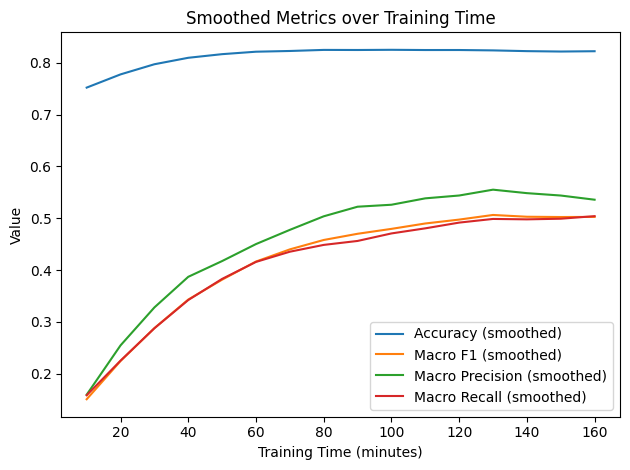

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Training time cumulative (minutes) for epochs 1-16 (each epoch = 10 minutes)
times = [10 * i for i in range(1, 17)]

# Metrics for epochs 1-16
acc = np.array([0.7521, 0.7818, 0.7989, 0.8108, 0.8192, 0.8199, 0.8250, 0.8234,
       0.8261, 0.8245, 0.8245, 0.8248, 0.8246, 0.8223, 0.8205, 0.8223])
macro_f1 = np.array([0.1508, 0.2235, 0.2995, 0.3409, 0.3891, 0.4146, 0.4458, 0.4595,
            0.4690, 0.4817, 0.4879, 0.5002, 0.5042, 0.5147, 0.4899, 0.5026])
macro_p = np.array([0.1596, 0.2520, 0.3526, 0.3793, 0.4292, 0.4438, 0.4776, 0.5115,
           0.5222, 0.5332, 0.5229, 0.5592, 0.5496, 0.5567, 0.5391, 0.5358])
macro_r = np.array([0.1585, 0.2228, 0.2946, 0.3460, 0.3861, 0.4170, 0.4443, 0.4451,
           0.4564, 0.4672, 0.4886, 0.4859, 0.5004, 0.5098, 0.4835, 0.5041])

# Smoothing function: simple moving average
def smooth(y, window=3):
    kernel = np.ones(window) / window
    y_smooth = np.convolve(y, kernel, mode='same')
    # Restore endpoints to avoid edge dip
    y_smooth[0] = y[0]
    y_smooth[-1] = y[-1]
    return y_smooth

acc_s = smooth(acc)
f1_s = smooth(macro_f1)
p_s = smooth(macro_p)
r_s = smooth(macro_r)

plt.figure()
plt.plot(times, acc_s, label='Accuracy (smoothed)')
plt.plot(times, f1_s, label='Macro F1 (smoothed)')
plt.plot(times, p_s, label='Macro Precision (smoothed)')
plt.plot(times, r_s, label='Macro Recall (smoothed)')
plt.xlabel('Training Time (minutes)')
plt.ylabel('Value')
plt.title('Smoothed Metrics over Training Time')
plt.legend()
plt.tight_layout()
plt.show()


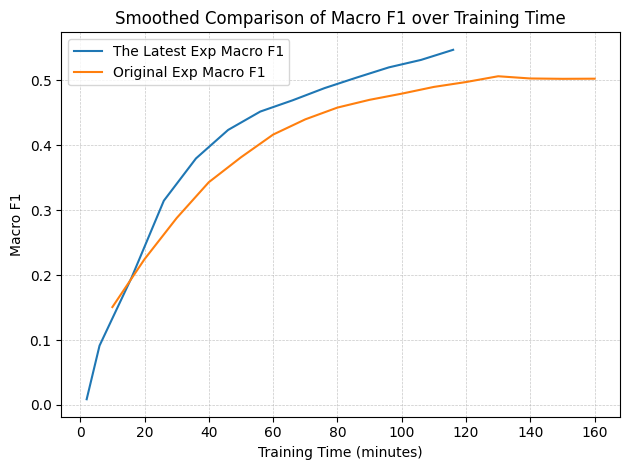

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment 1: 13 epochs
times1 = np.array([2, 6] + [6 + 10 * i for i in range(1, 12)])
macro_f1_exp1 = np.array([0.0088, 0.0294, 0.2359, 0.3242, 0.3838, 0.4313,
                          0.4559, 0.4687, 0.4830, 0.5126, 0.5175, 0.5300, 0.5471])

# Experiment 2: 16 epochs
times2 = np.array([10 * i for i in range(1, 17)])
macro_f1_exp2 = np.array([0.1508, 0.2235, 0.2995, 0.3409, 0.3891, 0.4146,
                          0.4458, 0.4595, 0.4690, 0.4817, 0.4879, 0.5002,
                          0.5042, 0.5147, 0.4899, 0.5026])

# Smoothing function: simple moving average
def smooth(y, window=3):
    kernel = np.ones(window) / window
    y_smooth = np.convolve(y, kernel, mode='same')
    y_smooth[0] = y[0]
    y_smooth[-1] = y[-1]
    return y_smooth

exp1_s = smooth(macro_f1_exp1)
exp2_s = smooth(macro_f1_exp2)

plt.figure()
plt.plot(times1, exp1_s, label='The Latest Exp Macro F1')
plt.plot(times2, exp2_s, label='Original Exp Macro F1')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Training Time (minutes)')
plt.ylabel('Macro F1')
plt.title('Smoothed Comparison of Macro F1 over Training Time')
plt.legend()
plt.tight_layout()
plt.show()


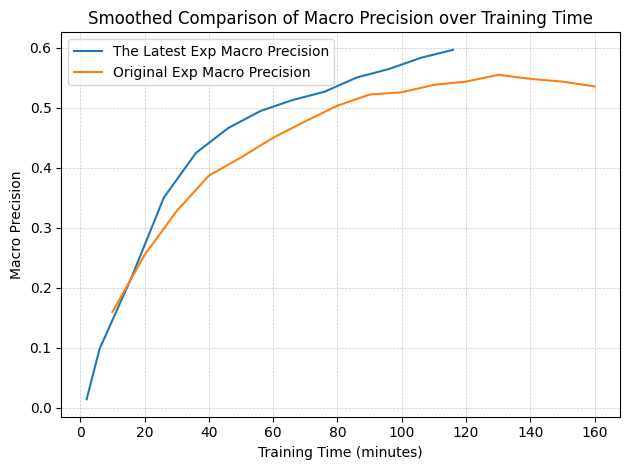

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment 1: 13 epochs
times1 = np.array([2, 6] + [6 + 10 * i for i in range(1, 12)])
macro_p_exp1 = np.array([
    0.0142, 0.0266, 0.2529, 0.3745, 0.4237, 0.4767,
    0.4986, 0.5089, 0.5317, 0.5405, 0.5799, 0.5741, 0.5969
])

# Experiment 2: 16 epochs
times2 = np.array([10 * i for i in range(1, 17)])
macro_p_exp2 = np.array([
    0.1596, 0.2520, 0.3526, 0.3793, 0.4292, 0.4438,
    0.4776, 0.5115, 0.5222, 0.5332, 0.5229, 0.5592,
    0.5496, 0.5567, 0.5391, 0.5358
])

# Smoothing function: simple moving average
def smooth(y, window=3):
    kernel = np.ones(window) / window
    y_smooth = np.convolve(y, kernel, mode='same')
    y_smooth[0] = y[0]
    y_smooth[-1] = y[-1]
    return y_smooth

exp1_s = smooth(macro_p_exp1)
exp2_s = smooth(macro_p_exp2)

plt.figure()
plt.plot(times1, exp1_s, label='The Latest Exp Macro Precision')
plt.plot(times2, exp2_s, label='Original Exp Macro Precision')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Training Time (minutes)')
plt.ylabel('Macro Precision')
plt.title('Smoothed Comparison of Macro Precision over Training Time')
plt.legend()
plt.tight_layout()
plt.show()


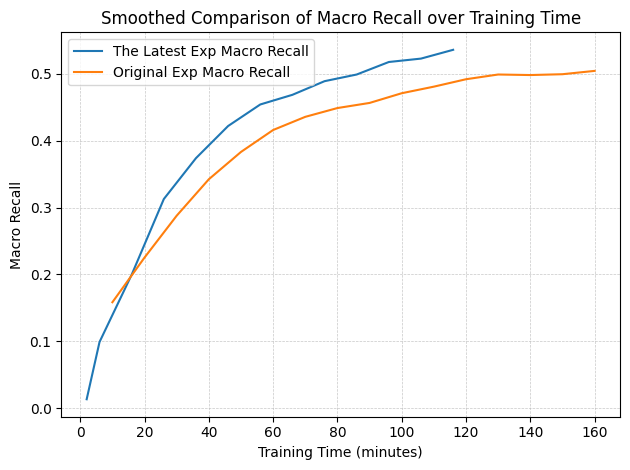

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Experiment 1: 13 epochs
times1 = np.array([2, 6] + [6 + 10 * i for i in range(1, 12)])
macro_r_exp1 = np.array([
    0.0136, 0.0392, 0.2446, 0.3153, 0.3782, 0.4278,
    0.4593, 0.4747, 0.4711, 0.5204, 0.5046, 0.5272, 0.5356
])

# Experiment 2: 16 epochs
times2 = np.array([10 * i for i in range(1, 17)])
macro_r_exp2 = np.array([
    0.1585, 0.2228, 0.2946, 0.3460, 0.3861, 0.4170,
    0.4443, 0.4451, 0.4564, 0.4672, 0.4886, 0.4859,
    0.5004, 0.5098, 0.4835, 0.5041
])

# Smoothing function: simple moving average
def smooth(y, window=3):
    kernel = np.ones(window) / window
    y_smooth = np.convolve(y, kernel, mode='same')
    y_smooth[0] = y[0]
    y_smooth[-1] = y[-1]
    return y_smooth

exp1_s = smooth(macro_r_exp1)
exp2_s = smooth(macro_r_exp2)

plt.figure()
plt.plot(times1, exp1_s, label='The Latest Exp Macro Recall')
plt.plot(times2, exp2_s, label='Original Exp Macro Recall')
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.xlabel('Training Time (minutes)')
plt.ylabel('Macro Recall')
plt.title('Smoothed Comparison of Macro Recall over Training Time')
plt.legend()
plt.tight_layout()
plt.show()
